In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from tools.parametrize.explore import explore
from tools.basic.loadsavejson import loadjson
from scipy import stats
from functions.get_params import get_params

In [2]:
main_path = "output"
# search vars.json
df,paths = explore(main_path)
#
# html show 
df.style.set_properties(**{'text-align': 'left'})
df[["study","ncases","exe_cases","finished","date"]]

,study,ncases,exe_cases,finished,date
0,[h],3,3,True,"[2024-02-14, 16-28-05]"
1,[h],3,3,True,"[2024-02-14, 16-54-31]"


In [3]:
studycase_1 = get_params(df.paths.loc[0])
studycase_2 = get_params(df.paths.loc[1])

IndexError: list index out of range

In [4]:
# merge dict    
studycase = studycase_1.copy()
for key in studycase.keys():
    studycase[key] += studycase_2[key]
    
theta = np.array(studycase["theta"])*180/np.pi
denier_per_new = studycase["denier_per_new"]
radius_max = studycase["radius_max"]
diameter= 2*np.array(radius_max)


NameError: name 'studycase_1' is not defined

In [8]:
denier_exp = 540  # denier
diameter_exp   = 4 # mm

Text(0.5, 0, '$\\theta (deg)$')

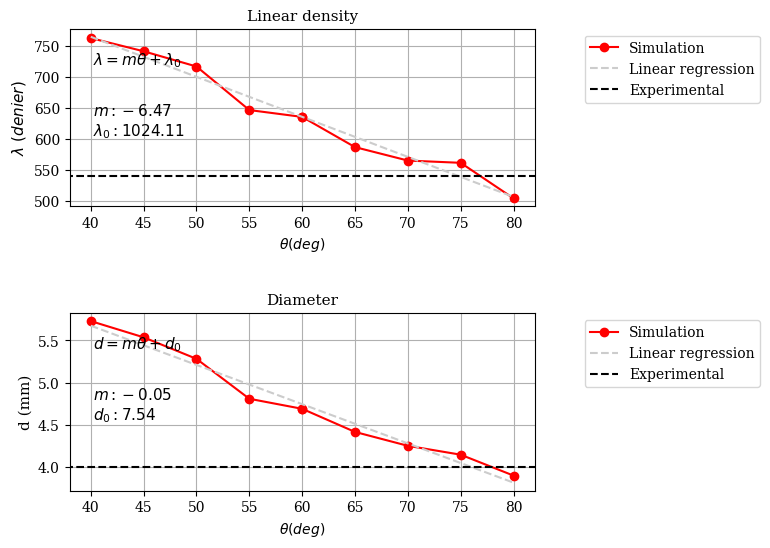

In [9]:
fig = plt.figure(figsize=(6,6))
fontsize = 11
# fonttimes = "Times New Roman"
font = "Serif"
# default
plt.rcParams['font.family'] = font
# padding
plt.subplots_adjust(hspace=0.6)

# ========================

plt.subplot(2,1,1)

plt.plot(theta,denier_per_new,"o-",color="red",label="Simulation")
#linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(theta,denier_per_new)

# text slope and intercept
plt.text(0.05,0.4,
         r"$m: {:.2f}$" "\n" r"$\lambda_0: {:.2f}$".format(slope,intercept),   
         transform=plt.gca().transAxes,
         fontsize=fontsize)
# text formula
plt.text(0.05,0.8,
         r"$\lambda = m \theta + \lambda_0$",
            transform=plt.gca().transAxes,
            fontsize=fontsize)
plt.plot(theta, intercept + slope*theta, '--', label="Linear regression",color=3*[0.8])
plt.xlabel(r"$\theta (deg)$")
plt.ylabel(r"$\lambda \ (denier)$",fontsize=fontsize)
plt.title("Linear density",fontsize=fontsize)

xlims = plt.xlim()
plt.plot([0,90],[denier_exp,denier_exp],"--",color="black",label="Experimental")
plt.xlim(xlims)
plt.legend(loc="upper right",bbox_to_anchor=(1.5,1))

plt.grid()

# ========================

plt.subplot(2,1,2)


plt.plot(theta,diameter,
         "o-",
         color="red",
         label="Simulation")

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(theta,diameter)
plt.plot(theta, intercept + slope*theta, '--', label="Linear regression",color=3*[0.8])
# text slope and intercept
plt.text(0.05,0.4,
         r"$m: {:.2f}$" "\n" r"$d_0: {:.2f}$".format(slope,intercept),   
         transform=plt.gca().transAxes,
         fontsize=fontsize)
# text formula
plt.text(0.05,0.8,
         r"$d = m \theta + d_0$",
            transform=plt.gca().transAxes,
            fontsize=fontsize)

xlims = plt.xlim()

plt.plot([0,90],[diameter_exp,diameter_exp],"--",color="black",label="Experimental")
plt.xlim(xlims)
plt.title("Diameter",fontsize=fontsize)
plt.ylabel("d (mm)",fontsize=fontsize)
# outside box
plt.legend(loc="upper right",bbox_to_anchor=(1.5,1))
plt.grid()
plt.xlabel(r"$\theta (deg)$")


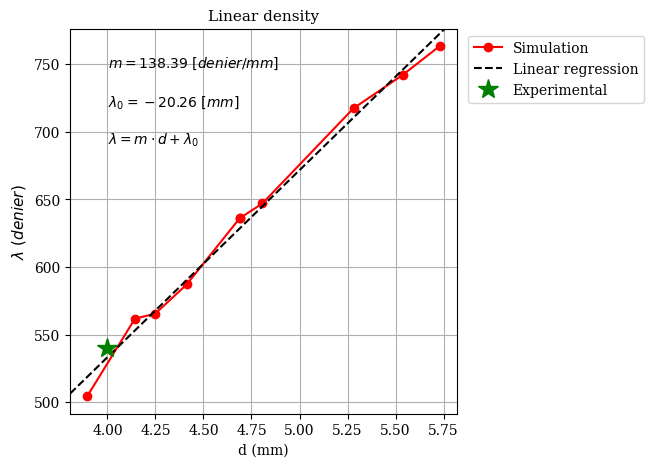

In [10]:
# denier vs radius
fig = plt.figure(figsize=(5,5))

plt.plot(2*np.array(radius_max),denier_per_new,"o-",color="red",label="Simulation")
# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(2*np.array(radius_max),denier_per_new)
x = np.linspace(0,10,100)
xlims = plt.xlim()
ylims = plt.ylim()
plt.plot(x,slope*x+intercept,"--",color="black",label="Linear regression")
plt.xlim(xlims)
plt.ylim(ylims)
plt.xlabel("d (mm)")
plt.ylabel(r"$\lambda \ (denier)$",fontsize=fontsize)
# text box m and b
plt.text(0.1,0.9,r"$m = {:.2f} \ [denier/mm]$".format(slope),transform=plt.gca().transAxes)
plt.text(0.1,0.8,r"$\lambda_0 = {:.2f} \ [mm]$".format(intercept),transform=plt.gca().transAxes)

# experimental point 
plt.plot(diameter_exp,denier_exp,"*",color="g",label="Experimental",markersize=15)

# box \lambda = m \cdot d + r_0
plt.text(0.1,0.7,r"$\lambda = m \cdot d + \lambda_0$",transform=plt.gca().transAxes)
plt.title("Linear density",fontsize=fontsize)
plt.legend(loc="upper right",bbox_to_anchor=(1.5,1))
plt.grid()


In [11]:
frd_path = df.paths.loc[1][0] + "/inflation/init.frd"

In [12]:
from tools.calculix.frd.readfrd import readfrd

In [13]:
frd = readfrd(frd_path)

In [14]:
nodes = frd["data"]

In [15]:
getpos = lambda id: frd["data"].loc[id][["x","y","z"]].values
getpos_el = lambda element: np.array([ getpos(i) for i in element])[:4]

In [16]:
#%matplotlib ipympl

In [17]:
len(frd["mesh"])

81548

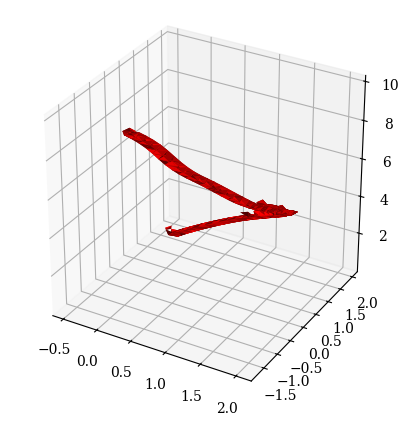

In [18]:
# 3d plot 
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
faces = np.array([[0,1,2],[0,1,3],[0,2,3],[1,2,3]])

for i in range(500):
    element = frd["mesh"][i]
    positions = getpos_el(element)
    #ax.plot3D(positions[:,0],positions[:,1],positions[:,2],".")
    # faces
    ax.plot_trisurf(positions[:,0],
                    positions[:,1],
                    positions[:,2],
                    triangles=faces,
                    color="red")
# aspect ratio
ax.set_box_aspect((1,1,1))